**NumtaDB** is a database.  The NumtaDB database contains handwritten Bengali digits (০ through ৯) and can provide a baseline for testing Bengali digit recognition using the machine and deep learning architecture.

<div align="center">
<img src="https://drive.google.com/uc?id=1Y6Xy0VzlVYmKp-4ZZ8UNaCZ1mBT5WxP7" width="300">
<img src="https://drive.google.com/uc?id=1TtnZP23KR-WRAvlXAIWNY_9zGIAiM_h0"width="300">
<figcaption>figure 1: NumtaDB dataset Snapshot</figcaption>
</div>



<div align="center">
<img src="https://drive.google.com/uc?id=1xe_bR1x1IDN-stNX5guGR6pfm3F5RQ3Q" width="600">
<figcaption>figure 2: NumtDB Network </figcaption>
<div/>





**Importing Necessary Libaries**

In [ ]:
import os
from os import path
import shutil
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset
from torch.utils.data.sampler import SubsetRandomSampler
from torchvision import datasets, transforms, models
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image

#**Pre Processing**

---
In the website([https://www.kaggle.com/BengaliAI/numta](https://))I found a 2GB file to download the NumtaDB dataset.From there, I found the training image dataset is divided into five folders alongside five CSV files. When I load the dataset in train Model It through an error said '**stack expects each tensor to be equal size, but got [1,28,28] at entry 0 and [1,29,28] at entry 3**'.I was really confused as I reshaped all images into 28*28 dimensions while putting them in the trained model. After a lot of trial and trial, I found 2 folders of train sets were in a different shape than other threes. So I reshape those two folders in the same dimension as the other three. From the snapshots, the dimensions issue is clearly visible.

<div align="center">
<img src="https://drive.google.com/uc?id=1q0hItTGVHODPqqgOQWB5t0X43OgKyJLm" width="300">
<img src="https://drive.google.com/uc?id=1RnwYRErytK0ei6LYMU2MuaXOEW4OeejM" width="300">
<figcaption>figure 3: Dimension Issue on folders</figcaption>
</div>

# Re-size Code
```

from PIL import Image
import glob
import os

# new folder path (may need to alter for Windows OS)
# change path to your path
path = 'C:/Users/Anas/Downloads/archivexx/training-b'
# create new folder
if not os.path.exists(path):
    os.makedirs(path)

# loop over existing images and resize
# change path to your path
for filename in glob.glob('C:/Users/Anas/Downloads/ archive/training-b/*.png'):
    img = Image.open(filename).resize((180,180))
    # save resized images to new folder with existing filename
    img.save('{}{}{}'.format(path,'/',os.path.split(filename)[1]))
```
Labels are correctly done by the authors to performing my assignment.So I did not make any change in CSV files.



- **Input dimension:**
  - Size of image: $28 \times 28 = 784$

- **Output dimension: 10**
  - ০   ১   ২   ৩   ৪   ৫   ৬   ৭   ৮   ৯ 


*   **Dataset Length : 72045**



> As I was able to solve the problem of **dimension error** in two folder , I took all the datasets for my assignment.







**For Accessing Drive Contents**

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


**Google Drive directory for Files**

In [ ]:
PATH = '/content/gdrive/MyDrive/sc_data_as1/namtadb/'
os.listdir(PATH)

['training-a.csv',
 'training-c.csv',
 'training-b.csv',
 'training-d.csv',
 'training-e.csv',
 'training-a',
 'training-b',
 'training-c',
 'training-d',
 'training-e',
 'trainx',
 'trainy',
 'Namta_logistic1.pkl',
 'Namta_logistic3.pkl',
 'Namta_logistic4.pkl',
 'Namta_logistic2.pkl',
 'Namta_logistic5.pkl',
 'Namta_logistic6.pkl']

**A function for reading data from CSV files**

In [ ]:
def showRawTrainingSamples(csv_filename):
  df = pd.read_csv(PATH + csv_filename)
  print(csv_filename)
  print(df.columns)
  return df

In [ ]:
a_csv = showRawTrainingSamples('training-a.csv')
b_csv = showRawTrainingSamples('training-b.csv')
c_csv = showRawTrainingSamples('training-c.csv')
d_csv = showRawTrainingSamples('training-d.csv')
e_csv = showRawTrainingSamples('training-e.csv')

training-a.csv
Index(['filename', 'original filename', 'scanid', 'digit',
       'database name original', 'contributing team', 'database name'],
      dtype='object')
training-b.csv
Index(['filename', 'original filename', 'scanid', 'digit',
       'database name original', 'contributing team', 'database name'],
      dtype='object')
training-c.csv
Index(['filename', 'original filename', 'scanid', 'digit',
       'database name original', 'contributing team', 'database name'],
      dtype='object')
training-d.csv
Index(['original filename', 'scanid', 'digit', 'num', 'database name original',
       'database name', 'filename'],
      dtype='object')
training-e.csv
Index(['filename', 'original filename', 'districtid', 'institutionid',
       'gender', 'age', 'datestamp', 'scanid', 'digit',
       'database name original', 'database name'],
      dtype='object')


In [ ]:
def dropColumns(csv_file):
  csv_file = csv_file[['filename', 'digit']]
  print(csv_file)
  print(csv_file.iloc[:5, :])   #First 5 Rows of the CSV File
  print("=============================")
  return csv_file

In [ ]:
a_csv = dropColumns(a_csv)
b_csv = dropColumns(b_csv)
c_csv = dropColumns(c_csv)
d_csv = dropColumns(d_csv)
e_csv = dropColumns(e_csv)

         filename  digit
0      a00000.png      5
1      a00001.png      3
2      a00002.png      1
3      a00003.png      7
4      a00004.png      0
...           ...    ...
19697  a19697.png      4
19698  a19698.png      3
19699  a19699.png      8
19700  a19700.png      3
19701  a19701.png      8

[19702 rows x 2 columns]
     filename  digit
0  a00000.png      5
1  a00001.png      3
2  a00002.png      1
3  a00003.png      7
4  a00004.png      0
       filename  digit
0    b00000.png      0
1    b00001.png      2
2    b00002.png      5
3    b00003.png      2
4    b00004.png      5
..          ...    ...
354  b00354.png      5
355  b00355.png      9
356  b00356.png      2
357  b00357.png      1
358  b00358.png      2

[359 rows x 2 columns]
     filename  digit
0  b00000.png      0
1  b00001.png      2
2  b00002.png      5
3  b00003.png      2
4  b00004.png      5
         filename  digit
0      c00000.png      6
1      c00001.png      1
2      c00002.png      3
3      c00003.png     

**Merging CSV files**

In [ ]:
total_csv = [a_csv, b_csv,c_csv, d_csv,e_csv]
merged_csv = pd.concat(total_csv)
print(len(merged_csv))

72045


**Create a Path for merged Images on Drive**

In [ ]:
TRAIN_PATH = '/content/gdrive/MyDrive/sc_data_as1/namtadb/trainy'
#os.mkdir(TRAIN_PATH)

**Merging image Function**

In [ ]:
def processImages(folder_name):
  src = PATH + folder_name + '/'
  dir_folders = os.listdir(src)
  for dir_name in dir_folders:
    file_name = os.path.join(src, dir_name)
    if os.path.isfile(file_name):
      shutil.copy(file_name, TRAIN_PATH)

**Calling merger function for images**

In [ ]:
processImages('training-a')
print('A Complete')
processImages('training-b')
print('B Complete')
processImages('training-c')
print('C Complete')
processImages('training-d')
print('D Complete')
processImages('training-e')
print('E Complete')

A Complete
B Complete
C Complete
D Complete
E Complete


**Create a Custom Dataset Function**

In [ ]:
class Dataset(Dataset):
    def __init__(self, df, root, transform=None):
        self.data = df
        self.root = root
        self.transform = transform
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):
        item = self.data.iloc[index]
        
        path = self.root + "/" + item[0]
        image = Image.open(path).convert('L')
        label = item[1]
        
        if self.transform is not None:
            image = self.transform(image)
            
        return image, label

In [ ]:
mean = [0.5,]
std = [0.5, ]
c=1

train_transform = transforms.Compose([
    #transforms.Grayscale(c),
    transforms.Resize(28),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

test_transform = transforms.Compose([
        #transforms.Grayscale(c)
        transforms.Resize(28),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
])

train_data  = Dataset(merged_csv, TRAIN_PATH, train_transform)
test_data = Dataset(merged_csv, TRAIN_PATH, test_transform)

print("Trainig Samples: ",len(train_data))

Trainig Samples:  72045


#Hyper Parameter


*  **Epochs:**
One Epoch is when an entire dataset is passed forward and backward through the neural network only once.
*  **Batch Size:**
Total number of training examples present in a single batch.

*  **Iterations:** Iterations is the number of batches needed to complete one epoch.


* **Learning Rate:** The amount that the weights are updated during training is referred to as the step size or the “learning rate.”











#**Hyper Parameter Tuning**

##Case 01
First I randomly took  **batch size**,**iteration** and **learning rate** in accordance of **150,6000 and 0.004**.As the number of batch size is small I took a comparatively large learning rate and decide to give a larger iteration number as comparatively less batch size was used. The length of the dataset was 72045. So,

> $epoch$ $number = (6000*150)/72045 = 12 epoches$


> After Implementing logistic Regression found **36.3%** accuracy with this setting.

In [ ]:
#setting hpt 1
#36
#Case1
#HyperParameterTuning5
batch_size = 150
num_iters = 6000
input_dim = 28*28 # num_features = 784
output_dim = 10
learning_rate = 0.004
# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

##Case 02
After getting less accuracy in setting 1, I changed the  **batch size**,**iteration**, and **learning rate** in accordance with **175,5000 and 0.005**.I increased the batch size so took a comparatively larger learning rate than settings 1 and decide to give a smaller iteration number as a comparatively large batch size used. The length of the dataset was 72045. So,

> $epoch$ $number = (5000*175)/72045 = 12 epoches$


>  After Implementing logistic Regression found **37.2%** accuracy with this setting.


In [ ]:
#setting hpt 2
#Case2
#HyperParameterTuning6
batch_size = 175
num_iters = 5000
input_dim = 28*28 # num_features = 784
output_dim = 10
learning_rate = 0.005
# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

##Case 03
After getting an accuracy of 37% in the previous setting I thought to use a very smaller learning rate with a large batch size in setting 3. So the  **batch size**,**iteration** and **learning rate** I chose for this settings are **256,6000 and 0.0004**.I increased the batch size so took a comparatively smaller learning rate. The length of the dataset was 72045. So,

> $epoch$ $number = (6000*256)/72045 = 21 epoches$


>  After Implementing logistic Regression found **42.7%** accuracy with this setting.


In [ ]:
#setting hpt 3
#Case3
#HyperParameterTuning1
batch_size = 300
num_iters = 4000
input_dim = 28*28 # num_features = 784
output_dim = 10
learning_rate = 0.0003
# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

##Case 04
After getting a boost in setting 3 with an accuracy of 42%  I realized that a larger batch size with a small learning rate may help to get a more accurate result. So  in this setting I took **batch size**,**iteration** and **learning rate** in accordance with **400,5500 and 0.0009** .I increased the batch size so took a small learning rate and decide to gave an iteration number of 5500. The length of the dataset was 72045. So,

> $epoch$ $number = (5500*400)/72045 = 30 epoches$


>  After Implementing logistic Regression found **44.47%** accuracy with this setting.


In [ ]:
#setting hpt 4
#HyperParameterTuning44
batch_size = 400
num_iters = 5500
input_dim = 28*28 # num_features = 784
output_dim = 10
learning_rate = 0.0009
# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

##Case 05
After getting 44% accurancy I changed the batch size and increased it a little with same learning rate and iteration number.The value of **batch size**,**iteration** and **learning rate** in setting 5 are **420,5500,0.0009**.The length of the dataset was 72045.So,

> $epoch$ $number = (5500*420)/72045 = 32 epoches$


>  After Implementing logistic Regression found **45.76%** accuracy with this setting.


In [ ]:
#setting hpt 5
#HyperParameterTuning5 45
batch_size = 420
num_iters = 5500
input_dim = 28*28 # num_features = 784
output_dim = 10
learning_rate = 0.0009
# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

**Sending data to train and test loader**

In [ ]:
# split data 10% for testing
test_size = 0.1
train_data[0]
# obtain training indices that will be used for validation
num_train = len(train_data)

# mix data
# index of num of train
indices = list(range(num_train))
#print(indices)
# random the index
np.random.shuffle(indices)
split = int(np.floor(test_size * num_train))
#print(split)
# divied into two part
train_idx, test_idx = indices[split:], indices[:split]
#print(train_idx)
#print(test_idx)

# define the sampler
train_sampler = SubsetRandomSampler(train_idx)
test_sampler = SubsetRandomSampler(test_idx)
#print(train_sampler)
#print(test_sampler)
# prepare loaders
train_loader = torch.utils.data.DataLoader(
    train_data, batch_size=batch_size,
    sampler=train_sampler)

test_loader = torch.utils.data.DataLoader(
    test_data, batch_size=batch_size,
    sampler=test_sampler)

#print("Train dataloader:{}".format(len(train_loader)))
#print("Test dataloader:{}".format(len(test_loader)))

In [ ]:
num_epochs = num_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)
print(num_epochs)
print(len(train_idx))
print(len(test_idx))

12
64841
7204


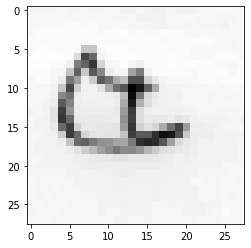

In [ ]:
## Displaying a Image

import matplotlib.pyplot as plt 
import numpy as np

show_img = train_data[0][0].numpy().reshape(28, 28)
plt.imshow(show_img, cmap='gray')

Label:
1


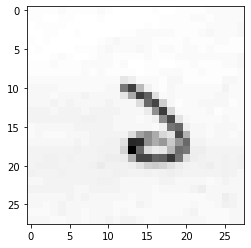

In [ ]:
## Displaying another  Image
# Label
print("Label:")
print(train_data[2][1])

show_img = train_data[2][0].numpy().reshape(28, 28)
plt.imshow(show_img, cmap='gray')

In [ ]:
# One Image Size
print(train_data[0][0].size())
print(train_data[0][0].numpy().shape)
# First Image Label
print(train_data[59][1])

torch.Size([1, 28, 28])
(1, 28, 28)
2


# Logistic Regression

Logistic Regression is an example of a classification algorithm which is used to find a relationship between features and the probability of a particular outcome. The term “Logistic” is taken from the Logit function that is used in this method of classification. Instead of fitting a straight line or hyperplane, the logistic regression model uses the logistic function to squeeze the output of a linear equation between 0 and 1. The logistic function is defined as:

$logistic(η)=\frac{1}{1+exp(−η)}$

In [ ]:
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_size, num_classes):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, x):
        logits  = self.linear(x)
        probas = F.softmax(logits, dim=1)
        return logits, probas
        #return logits

In [ ]:
'''
INSTANTIATE MODEL CLASS
'''
model = LogisticRegressionModel(input_size=input_dim,
                                num_classes=output_dim)

#To enable GPU
model.to(device)

LogisticRegressionModel(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)

**For optimizer I used Adam**

The Adam optimization algorithm is an extension to stochastic gradient descent that has recently seen broader adoption for deep learning applications in computer vision and natural language processing.

In [ ]:
# INSTANTIATE OPTIMIZER CLASS
#optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
train_data[18][0].numpy().shape

(1, 28, 28)

**Training Model**

In [ ]:
#t1
#setting05
'''
TRAIN THE MODEL
'''
iteration_loss = []
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        logits, probas = model(images) 

        # Calculate Loss: PyTorch implementation of CrossEntropyLoss works with logits, not probabilities
        loss = F.cross_entropy(logits, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                logits, probas = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(probas, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 2.095184087753296. Accuracy: 31.81565796779567
Iteration: 1000. Loss: 2.005549430847168. Accuracy: 35.161021654636315
Iteration: 1500. Loss: 1.935590386390686. Accuracy: 38.367573570238754
Iteration: 2000. Loss: 1.8923746347427368. Accuracy: 43.406440866185456
Iteration: 2500. Loss: 1.9256457090377808. Accuracy: 37.68739589117157
Iteration: 3000. Loss: 1.7767210006713867. Accuracy: 35.258189894503055
Iteration: 3500. Loss: 1.7616372108459473. Accuracy: 36.715713492504165
Iteration: 4000. Loss: 1.877875804901123. Accuracy: 35.95224875069406
Iteration: 4500. Loss: 2.006199836730957. Accuracy: 35.41088284286508
Iteration: 5000. Loss: 1.7080999612808228. Accuracy: 36.313159355913385


In [ ]:
#t2
#setting06
'''
TRAIN THE MODEL
'''
iteration_loss = []
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        logits, probas = model(images) 

        # Calculate Loss: PyTorch implementation of CrossEntropyLoss works with logits, not probabilities
        loss = F.cross_entropy(logits, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                logits, probas = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(probas, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 1.9303076267242432. Accuracy: 31.70460855080511
Iteration: 1000. Loss: 1.8982239961624146. Accuracy: 35.79955580233204
Iteration: 1500. Loss: 1.9955881834030151. Accuracy: 34.16157690172127
Iteration: 2000. Loss: 1.7692346572875977. Accuracy: 37.95113825652415
Iteration: 2500. Loss: 1.6683499813079834. Accuracy: 32.10716268739589
Iteration: 3000. Loss: 1.851629614830017. Accuracy: 31.177123820099943
Iteration: 3500. Loss: 1.7347426414489746. Accuracy: 35.9106052193226
Iteration: 4000. Loss: 1.8528388738632202. Accuracy: 37.32648528595225


In [ ]:
#t3
#setting07
'''
TRAIN THE MODEL
'''
iteration_loss = []
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        logits, probas = model(images) 

        # Calculate Loss: PyTorch implementation of CrossEntropyLoss works with logits, not probabilities
        loss = F.cross_entropy(logits, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                logits, probas = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(probas, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 1.9610687494277954. Accuracy: 29.06718489727929
Iteration: 1000. Loss: 1.855689525604248. Accuracy: 33.20377568017768
Iteration: 1500. Loss: 1.890579342842102. Accuracy: 34.46696279844531
Iteration: 2000. Loss: 1.824910283088684. Accuracy: 39.10327595780122
Iteration: 2500. Loss: 1.8607021570205688. Accuracy: 35.85508051082732
Iteration: 3000. Loss: 1.8201032876968384. Accuracy: 39.10327595780122
Iteration: 3500. Loss: 1.8243399858474731. Accuracy: 42.71238200999445


In [ ]:
#t4
#setting02
'''
TRAIN THE MODEL
'''
iteration_loss = []
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        logits, probas = model(images) 

        # Calculate Loss: PyTorch implementation of CrossEntropyLoss works with logits, not probabilities
        loss = F.cross_entropy(logits, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                logits, probas = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(probas, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 1.8388433456420898. Accuracy: 42.67073847862299
Iteration: 1000. Loss: 1.806343913078308. Accuracy: 43.11493614658523
Iteration: 1500. Loss: 1.8534287214279175. Accuracy: 43.781232648528594
Iteration: 2000. Loss: 1.8066343069076538. Accuracy: 42.337590227651305
Iteration: 2500. Loss: 1.7741936445236206. Accuracy: 42.032204330927264
Iteration: 3000. Loss: 1.7631690502166748. Accuracy: 43.392559689061635
Iteration: 3500. Loss: 1.8337496519088745. Accuracy: 42.90671848972793
Iteration: 4000. Loss: 1.7701524496078491. Accuracy: 43.17046085508051
Iteration: 4500. Loss: 1.681371808052063. Accuracy: 44.4752915047196


In [ ]:
#45
'''
TRAIN THE MODEL
'''
iteration_loss = []
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        logits, probas = model(images) 

        # Calculate Loss: PyTorch implementation of CrossEntropyLoss works with logits, not probabilities
        loss = F.cross_entropy(logits, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                logits, probas = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(probas, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 1.7784876823425293. Accuracy: 43.281510272071074
Iteration: 1000. Loss: 1.7371859550476074. Accuracy: 44.48917268184342
Iteration: 1500. Loss: 1.6668457984924316. Accuracy: 44.29483620210994
Iteration: 2000. Loss: 1.8076945543289185. Accuracy: 42.337590227651305
Iteration: 2500. Loss: 1.8053865432739258. Accuracy: 45.08606329816769
Iteration: 3000. Loss: 1.9111237525939941. Accuracy: 44.48917268184342
Iteration: 3500. Loss: 1.7157378196716309. Accuracy: 45.75235980011105
Iteration: 4000. Loss: 1.7246185541152954. Accuracy: 42.4069961132704
Iteration: 4500. Loss: 1.7342727184295654. Accuracy: 45.76624097723487


## Comparison Table

**NumtaDB Dataset Comparision Table in Different Settings:-**

| Settings        | Batch Size     | Iteration Number|Learing rate   |Epochs| Accuracy(%)|Dataset Length|
| :------------- | :----------: | -----------: | ------------:|--------:|------------:|----------:|
|  1 | 150   | 6000 |0.004   | 12 |36.31||
|  2 | 175   | 5000 |0.005  | 12 |37.32|||
|  3 | 256  | 6000  |0.0004  | 21 |**42.71**|**72045**|
|  4 | 400  | 5500  |0.0009  | 30 |**44.47**||
|  5 | 420   | 5500 |0.0009   | 32|**45.76**||

**Loss Graphs**

[2.095184087753296, 2.005549430847168, 1.935590386390686, 1.8923746347427368, 1.9256457090377808, 1.7767210006713867, 1.7616372108459473, 1.877875804901123, 2.006199836730957, 1.7080999612808228]


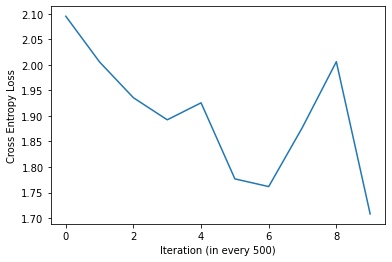

In [ ]:
#loss1
#5
import matplotlib
import matplotlib.pyplot as plt
print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

[1.9303076267242432, 1.8982239961624146, 1.9955881834030151, 1.7692346572875977, 1.6683499813079834, 1.851629614830017, 1.7347426414489746, 1.8528388738632202]


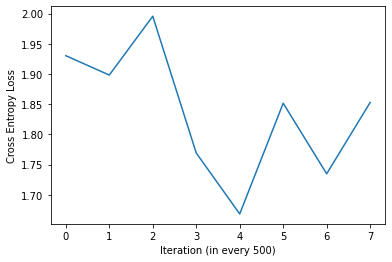

In [ ]:
#loss2
#6
import matplotlib
import matplotlib.pyplot as plt
print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

[1.9610687494277954, 1.855689525604248, 1.890579342842102, 1.824910283088684, 1.8607021570205688, 1.8201032876968384, 1.8243399858474731]


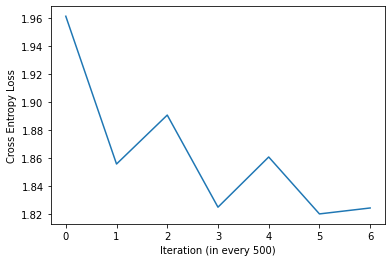

In [ ]:
#loss3
#7
import matplotlib
import matplotlib.pyplot as plt
print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()


[1.8388433456420898, 1.806343913078308, 1.8534287214279175, 1.8066343069076538, 1.7741936445236206, 1.7631690502166748, 1.8337496519088745, 1.7701524496078491, 1.681371808052063]


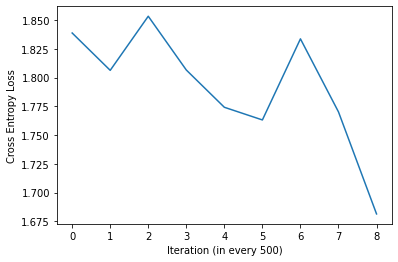

In [ ]:
#loss4
import matplotlib
import matplotlib.pyplot as plt
print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

[1.7784876823425293, 1.7371859550476074, 1.6668457984924316, 1.8076945543289185, 1.8053865432739258, 1.9111237525939941, 1.7157378196716309, 1.7246185541152954, 1.7342727184295654]


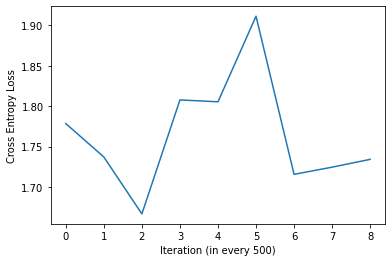

In [ ]:
#loss5
import matplotlib
import matplotlib.pyplot as plt
print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

**Accuracy Graphs**

[31.81565796779567, 35.161021654636315, 38.367573570238754, 43.406440866185456, 37.68739589117157, 35.258189894503055, 36.715713492504165, 35.95224875069406, 35.41088284286508, 36.313159355913385]


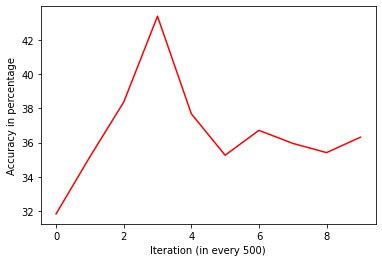

In [ ]:
#acc1
import matplotlib
import matplotlib.pyplot as plt
iteration_loss= [31.81565796779567, 35.161021654636315,38.367573570238754,43.406440866185456, 37.68739589117157,35.258189894503055, 36.715713492504165, 35.95224875069406,35.41088284286508,36.313159355913385]
print (iteration_loss)
plt.plot(iteration_loss,color="red")
plt.ylabel('Accuracy in percentage')
plt.xlabel('Iteration (in every 500)')
plt.show()

[31.70460855080511, 35.79955580233204, 35.79955580233204, 37.95113825652415, 32.10716268739589, 31.177123820099943, 35.9106052193226, 37.32648528595225]


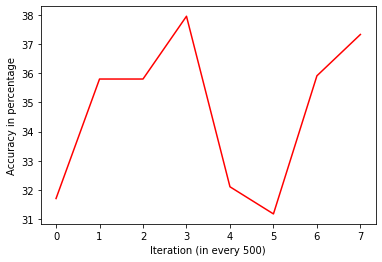

In [ ]:
#acc2
import matplotlib
import matplotlib.pyplot as plt
iteration_loss= [31.70460855080511,35.79955580233204,35.79955580233204,37.95113825652415,32.10716268739589,31.177123820099943,35.9106052193226,37.32648528595225]
print (iteration_loss)
plt.plot(iteration_loss,color="red")

plt.ylabel('Accuracy in percentage')
plt.xlabel('Iteration (in every 500)')
plt.show()

[29.06718489727929, 33.20377568017768, 34.46696279844531, 39.10327595780122, 35.85508051082732, 39.10327595780122, 42.71238200999445]


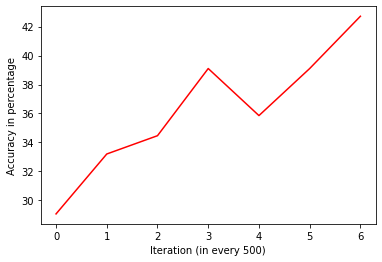

In [ ]:
#acc3
import matplotlib
import matplotlib.pyplot as plt
iteration_loss= [ 29.06718489727929, 33.20377568017768, 34.46696279844531,39.10327595780122,35.85508051082732,39.10327595780122,42.71238200999445]
print (iteration_loss)
plt.plot(iteration_loss,color="red")
plt.ylabel('Accuracy in percentage')
plt.xlabel('Iteration (in every 500)')
plt.show()

[42.67073847862299, 43.11493614658523, 43.781232648528594, 42.337590227651305, 42.032204330927264, 43.392559689061635, 42.90671848972793, 43.17046085508051, 44.4752915047196]


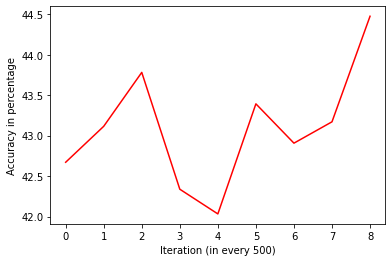

In [ ]:
#acc4
import matplotlib
import matplotlib.pyplot as plt
iteration_loss= [42.67073847862299,43.11493614658523,43.781232648528594,42.337590227651305,42.032204330927264,43.392559689061635,42.90671848972793,43.17046085508051,44.4752915047196]
print (iteration_loss)
plt.plot(iteration_loss,color="red")
plt.ylabel('Accuracy in percentage')
plt.xlabel('Iteration (in every 500)')
plt.show()

[43.281510272071074, 44.48917268184342, 44.29483620210994, 42.337590227651305, 45.08606329816769, 44.48917268184342, 45.75235980011105, 42.4069961132704, 45.76624097723487]


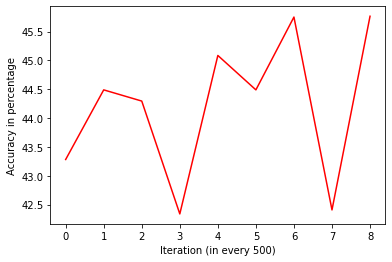

In [ ]:
#acc5
import matplotlib
import matplotlib.pyplot as plt
iteration_loss= [43.281510272071074,44.48917268184342,44.29483620210994,42.337590227651305,45.08606329816769,44.48917268184342,45.75235980011105,42.4069961132704,45.76624097723487]
print (iteration_loss)
plt.plot(iteration_loss,color="red")
plt.ylabel('Accuracy in percentage')
plt.xlabel('Iteration (in every 500)')
plt.show()

# A Comprehensive Study between Loss and Accuracy

**Case 1**
<div align="center">
<img src="https://drive.google.com/uc?id=1NOlJxbK017-ILi66rZLWceHSjDEug-PJ" width="300">
<img src="https://drive.google.com/uc?id=1KcUZA4zX8rIW4HOy4wUWX0g5meuHaZzt"width="300">
<figcaption>figure 4: Accuracy and Loss in Case 1 </figcaption>









> At the Initial time the loss was higher and accuracy was lower. Then after few iterations the loss started decreasing almost linearly and the accuracy too increased linearly. But after 3000 iteration the loss suddenly goes up and so the accuracy goes down. Thus at last the loss was decreasing and achieved a **36.31%** accuracy. As the datapoint was too complex  I was not able to achieve a linear loss function graph.




**Case 2**
<div align="center">
<img src="https://drive.google.com/uc?id=15x5kvbkguiXpGFQkJv-uhAKdqJ80EK21" width="300">
<img src="https://drive.google.com/uc?id=1DFTMitCbmITjYfBrbTEN-dFcYhyx1AiH"width="300">
<figcaption>figure 5: Accuracy and Loss in Case2 </figcaption>

> At the Initial time the loss was higher and accuracy was lower. After 1000 iteration the loss started decreasing almost linearly and the accuracy increased linearly. Then after 2000 iteration the loss suddenly goes up and so the accuracy goes down. Thus at last achieved a **37.32%** accuracy. As the datapoint was too complex  I was not able to achieve a linear loss function graph.

**Case 3**
<div align="center">
<img src="https://drive.google.com/uc?id=1NSVyN3ikvgcWxdXzXSaAB-eH8BYtYOlc" width="300">
<img src="https://drive.google.com/uc?id=1EaGiUpsO8peuOGz7Xq7c6XXoZQOZj0vW"width="300">
<figcaption>figure 6: Accuracy and Loss in Case3 </figcaption>

> At the Initial time the loss was higher and accuracy was lower. After 2000 iteration the loss started decreasing almost linearly and the accuracy too increased linearly. Thus at last the loss was increased slightly and achieved a **42.71%** accuracy. As the datapoint was too complex  I was not able to achieve a linear loss function graph.

**Case 4**
<div align="center">
<img src="https://drive.google.com/uc?id=178437tjJSUdwwcT3eOmqIDkyCpOHFNbu" width="300">
<img src="https://drive.google.com/uc?id=1ZZMDd8pa9gEsdeswyB6K7Rb7XHItM6UA"width="300">
<figcaption>figure 7: Accuracy and Loss in Case4 </figcaption>

> At the Initial time the loss was higher and accuracy was lower. After 2500 iteration the loss suddenly goes up and so the accuracy goes down. Thus at last the loss was decreasing almost linearly so the accuracy increased and achieved a **44.47%** accuracy. As the datapoint was too complex  I was not able to achieve a linear loss function graph.

**Case 5**
<div align="center">
<img src="https://drive.google.com/uc?id=1BDwPl0RtNQF1mcWn12nrkpRRMbD56prH" width="300">
<img src="https://drive.google.com/uc?id=1P6vcBJNvJvL6jA_P4-HfJDlGOE61Cslp"width="300">
<figcaption>figure 8: Accuracy and Loss in Case5 </figcaption>

> At the Initial time the loss was higher and accuracy was lower. After 500 iterations the loss started decreasing almost linearly and the accuracy too decreased slightly.But after 2500 iteration the loss suddenly goes down and so the accuracy goes up.Thus at last the loss was increasing slightly and achieved a **45.76%** accuracy. As the datapoint was too complex I was not able to achieve a linear loss function graph.

#Best Model

**Hyper Parameter Values**

$Batch$ $size = 420 $

$Iteration =5500$

$learning$ $Rate = 0.0009$




$Accuracy($%$) = 45.76$

In [ ]:
save_model = True

if save_model is True:
    # Saves only parameters
    # wights & biases
    torch.save(model.state_dict(), PATH + 'Namta_logistic6.pkl') 

In [ ]:
load_model = True

if load_model is True:
    model.load_state_dict(torch.load(PATH + 'Namta_logistic6.pkl'))
    print('Trained Model Loaded')

Trained Model Loaded


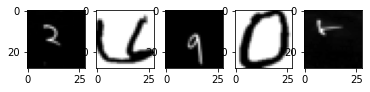

In [ ]:
for images, labels in test_loader:
    break
    
fig, ax = plt.subplots(1, 5)
for i in range(5):
    ax[i].imshow(images[i].view(28, 28), cmap=matplotlib.cm.binary)

plt.show()

In [ ]:
_, predictions = model.forward(images[:5].view(-1, 28*28).to(device))
predictions = torch.argmax(predictions, dim=1)
print('Predicted labels', predictions.cpu().numpy())

Predicted labels [9 6 7 0 9]


# Drive Links for Train Models

> **Setting 1:** [https://drive.google.com/file/d/1GZUUwHmDK8SEmNwPkn39STAuuA0OV-F9/view?usp=sharing](https://)

> **Setting 2:** [https://drive.google.com/file/d/1-1hdxxEGgggdThofPDOeHXkf0P7C8lcE/view?usp=sharing](https://)

> **Setting 3:** [https://drive.google.com/file/d/1SeFAyQT2egQg0_QyoILwvBSyIVExjEz_/view?usp=sharing](https://)

> **Setting 4:** [https://drive.google.com/file/d/1DTB7O2VMlQ7BNZerDUfP5Gu_0JSnNh8L/view?usp=sharing](https://)

> **Setting 5:** [https://drive.google.com/file/d/16uCs99VNcnxE6xRbvEig7Qs_IZnFzSNn/view?usp=sharing](https://)
